In [1]:
import cvxpy as cp
import numpy as np
from data1 import data,x,y,z
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from conowlLocal import neighborhood
from kMeans import kMeans, min_k_index, max_k_index
from copy import deepcopy

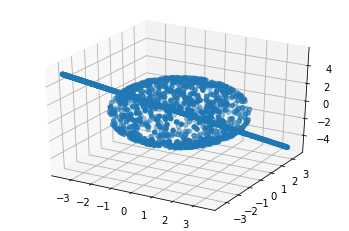

In [2]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [3]:
n_sample=len(data[0])
n_feature=len(data)

In [4]:
K=100
k1=100
k2=800
epsilon=1

In [5]:
indexs=np.random.choice(range(n_feature),K)
B=np.zeros((n_feature,n_feature))
I=[]
for i in range(n_feature):
    I.append(i)

In [6]:
def owl(beta):
    z = 0.1 * cp.norm1(beta) #lambda
    for i in range(1,90): #r
        z = z+cp.sum_largest(beta, i)*0.5 #delta
    return z

def loss_fn(X, Y, beta):
    return cp.norm2(cp.matmul(X, beta) - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

def objective_f1(X, Y, beta):
    return loss_fn(X, Y, beta) + owl(beta)

In [7]:
for index in indexs:
    kIndex = neighborhood(data[index],data,epsilon)
    n1 = len(kIndex)
    X = np.zeros((n_sample,n1))
    for i in range(n1):
        X[:,i]=data[kIndex[i]]
    Y = np.array(data[index])
    #c = np.ones(n1)
    beta = cp.Variable(n1)
    #constraints = [c*beta==1]
    problem = cp.Problem(cp.Minimize(objective_f1(X, Y, beta)))
    problem.solve()
    coef = beta.value
    for i in range(n1):
        B[kIndex[i],index]=coef[i]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
nonzero=[]
for index in range(n_feature):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(n_feature):
    if nonzero[i]!=0:
        nonzero_idx.append(i)

max(nonzero)
nonzero

In [ ]:
for i in range(len(nonzero_idx)):
    index=nonzero_idx[i]
    n=nonzero[index]
    idx=[]
    for i in range(1,n+1):
        idx.append(max_k_index(B[:,index],i))
    ax=plt.subplot(111)
    ax.scatter(y,z,color='yellow')
    ax.scatter(y[index],z[index],color='red')
    for i in range(n):
        ax.scatter(y[idx[i]],z[idx[i]],color='black')
    plt.show()